In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
path = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
data1 = pd.read_csv(path[1])
data2 = pd.read_csv(path[0])

In [19]:
data1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'O2'],
      dtype='object')

In [8]:
data2.head(10)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
5,97.5
6,97.5
7,97.5
8,97.5
9,97.5


In [10]:
data1['output'].unique()

array([1, 0])

In [11]:
data2.columns = ['O2']

In [12]:
data2.head()

,O2
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
data1['O2'] = data2['O2'].copy()

In [16]:
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,O2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [17]:
data1['cp'].unique()

array([3, 2, 1, 0])

In [20]:
len(data1['fbs'].unique())

2

In [35]:
y = data1['output']
del data1['output']

In [37]:
nom_dat = []
ord_dat =[]
num_dat = []

for i in data1.columns:
    if len(data1[i].unique()) <=10:
        print(i, ": ", len(data1[i].unique()), ": ", data1[i].unique())
        if len(data1[i].unique()) <=2:
            nom_dat.append(i)
        elif len(data1[i].unique()) >2 and len(data1[i].unique()) <=5:
            ord_dat.append(i)
    else:
        num_dat.append(i)

sex :  2 :  [1 0]
cp :  4 :  [3 2 1 0]
fbs :  2 :  [1 0]
restecg :  3 :  [0 1 2]
exng :  2 :  [0 1]
slp :  3 :  [0 2 1]
caa :  5 :  [0 2 1 3 4]
thall :  4 :  [1 2 3 0]
O2 :  7 :  [98.6 98.1 97.5 98.  97.  96.5 97.1]


In [45]:
ord_dat

['cp', 'restecg', 'slp', 'caa', 'thall']

In [38]:
nom_data = pd.get_dummies(data1[nom_dat], drop_first = True)

In [39]:
ord_data = data1[ord_dat].astype('category')

In [51]:
num_data = data1[num_dat]

In [52]:
num_data.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [53]:
data3 = pd.concat([nom_data, ord_data], axis=1)

In [54]:
data = pd.concat([data3,num_data], axis=1)

In [55]:
data.head()

,sex,fbs,exng,cp,restecg,slp,caa,thall,age,trtbps,chol,thalachh,oldpeak
0,1,1,0,3,0,0,0,1,63,145,233,150,2.3
1,1,0,0,2,1,0,0,2,37,130,250,187,3.5
2,0,0,0,1,0,2,0,2,41,130,204,172,1.4
3,1,0,0,1,1,2,0,2,56,120,236,178,0.8
4,0,0,1,0,1,2,0,2,57,120,354,163,0.6


In [57]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x = mx.fit_transform(data)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)

In [65]:
from sklearn import svm
svc = svm.SVC(kernel = 'poly', random_state = 0).fit(x_train, y_train)

In [66]:
y_pred = svc.predict(x_test)

In [77]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
print("Classification_Report:", classification_report(y_test, y_pred) )

Classification_Report:               precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [68]:
print("Roc Auc Score:", roc_auc_score(y_test, y_pred))

Roc Auc Score: 0.8218085106382979


In [78]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

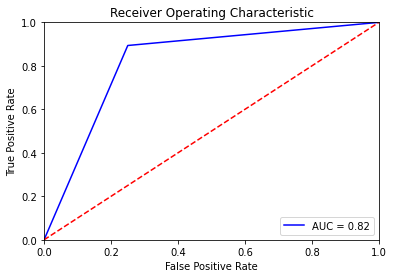

In [79]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()